### Natural Language Processing

Natural Language Processing (NLP) is a domain within Computer Science, specifically under the umbrella of Artificial Intelligence (AI). It equips computers with the ability to interpret, understand, and process human language—both text and speech—as naturally as humans do.

At the core of NLP lies a blend of computational linguistics—rules-based modeling of human language—with the dynamic power of statistical methods, machine learning, and deep learning models. This integration allows computers not only to process human language, whether in text or voice form but also to grasp the complete meaning, discerning the intent and sentiment of the speaker or writer.

For our exploration into the world of NLP, we will leverage the capabilities of prominent libraries including:
- **sklearn**
- **nltk**

NLP finds its application in a myriad of real-world scenarios, enhancing and streamlining our interactions and processes. Some notable applications are:
- Machine translation, bridging language barriers across the globe
- Spam detection, safeguarding our inboxes from unwanted emails
- Text summarization, distilling lengthy documents into concise summaries
- Chatbots, providing instant customer support and engagement

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

# from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**CountVectorizer** - Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [71]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names_out()).to_string())

Using count vectorizer
   apple  banana  orange
0      2       0       2
1      2       2       0
2      2       4       0
3      0       4       2
4      1       4       1


**TfidfVectorizer** - TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.


**Term Frequency (tf)**:
$\[ tf(t) = \text{"Number of times term } t \text{ occurs in a document"} \]$


**Inverse Document Frequency (idf)**:
$\[ idf(t) = \log_e \left( \frac{1 + n}{1 + df(t)} \right) + 1 \]$

Where:
- $\(t\)$ represents the term.
- $\(n\)$ is the total number of documents in the document set.
- $\(df(t)\)$ is the number of documents in the document set that contain the term \(t\).

- Reference: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [72]:
print("\nUsing tfidf")
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)
print(pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names_out()).to_string())


Using tfidf
      apple    banana    orange
0  0.643744  0.000000  0.765241
1  0.707107  0.707107  0.000000
2  0.447214  0.894427  0.000000
3  0.000000  0.859622  0.510931
4  0.233043  0.932173  0.277026


### Dataset:
- https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [91]:
df = pd.read_csv('Reviews.csv')

In [74]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [75]:
df.shape

(568454, 10)

- We would like to get an idea of the number of records that are 3 star and lower as well as 3 star and higher.

In [76]:
pos = df[df['Score']>3]
neg = df[df['Score']<3]
print(pos.shape, neg.shape)

(443777, 10) (82037, 10)


In [77]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(82037, 10) (82037, 10)


In [78]:
df = shuffle(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
88234,88235,B0001KH60Q,A18P6XJ6M9A1LN,"James L. Riedeman ""Honest Guy""",1,1,5,1254960000,Mulberry Jam review,This is the best mulberry jam I have purchased...
104279,104280,B0016512YG,A6D70S77UKA4K,MonkeyGurl,1,2,2,1308268800,A good deal?,"I love these cookies, generally, and the price..."
48900,48901,B000EHP62G,AWH9YY12Z10S5,G. Smith,0,1,5,1167782400,"crunchy, chewy favorite",My daughter requested i purchase these for her...
61611,61612,B001EO5R0Y,A3IKZU52IAXVI9,C. H. Walker,1,1,5,1190160000,Tasty and Good for You!,This is the perfect morning perk me up. The t...
25176,25177,B0081XIA1E,AAJ1HQ9RTBHET,Fancy_Nance,0,0,5,1347408000,I love the fact that it comes with a ball.,The toy seems pretty durable which is a big wi...


### Preprocessing
- Remove all neutral scores and seperate the remaning into positive = 1 and negative = 0.
- Preprocessing ususally involves:
    - Removing additional white spaces
    - Replacing emoji's with a word representation for example :) ==> smile
    - Removing links from the corpus
    - Removing punctuation
    - Removing HTML tags
    - Remove duplicate reviews
    - Here are some good links on how to process and clean text: 
        - https://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/ and https://machinelearningmastery.com/clean-text-machine-learning-python/

- **For this exercise we will only tokenize reviews, that is change "This is a review" to ['this', 'is', 'a', 'review'].**
- After the text is 'clean' we will use sklearn.

In [79]:
df = df[df['Score'] !=3]
X = df['Text']

y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_map)
# y = df['Score'].apply(lambda x: 0 if x < 3 else 1) # another way to do it

In [80]:
X.head(5)

88234     This is the best mulberry jam I have purchased...
104279    I love these cookies, generally, and the price...
48900     My daughter requested i purchase these for her...
61611     This is the perfect morning perk me up.  The t...
25176     The toy seems pretty durable which is a big wi...
Name: Text, dtype: object

In [81]:
y.head(5)

88234     1
104279    0
48900     1
61611     1
25176     1
Name: Score, dtype: int64

### Classification

Once the text is processed the next step is to do the actual classification. For this exercise we will be using a Logistic Regression Classifier. However there are many other popular classifiers that may perform better:

- Support Vector Machine and its variants
- Naive Bayes and its variants
- Random Forests and its variants

Let's create a function that takes in the training set X , test set y, the model being used model and the classification algorithm clf_model as well as a variable that will show the top coefficients if true coef_show

In [82]:
def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1: 
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

### Classification Experiments

- Logistic regression model on word count
- Logistic regression model on TFIDF
- Logistic regression model on TFIDF + ngram

NGram Definition: N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios). 

[Explanation and Example Here](https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/)

In [83]:
countv = CountVectorizer(stop_words = 'english')
text_fit(X, y, countv, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.9030341712490181

-Top 20 positive-
       Word  Coefficient
 pleasantly     3.902140
     hooked     2.957812
   drawback     2.921508
     resist     2.803161
  skeptical     2.754793
    welcome     2.655601
   downside     2.527523
      guilt     2.339884
    worries     2.303223
   terrific     2.286140
  addicting     2.234414
      penny     2.206325
tourangelle     2.130604
  delighted     2.092988
  delicious     2.085382
        met     2.060664
       beat     2.052787
     brings     2.039404
  excellant     2.029909
   receives     2.015859

-Top 20 negative-
          Word  Coefficient
     tasteless    -2.349839
          lame    -2.358037
      terrible    -2.364313
        bummer    -2.365051
    overpowers    -2.367958
       expired    -2.374898
      inferior    -2.430127
disappointment    -2.452606
        ripoff    -2.469447
       sounded    -2.477653
      refunded    -2.599512
  un

C:\msc_data_science_uwi_sta\semester_2_2023_2024\ta\comp3610\playground\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.8956696779261587

-Top 20 positive-
      Word  Coefficient
     great    11.419367
 delicious    10.147747
      best     9.675962
   perfect     8.907430
     loves     8.040719
 excellent     7.888819
    highly     7.712660
      love     7.358996
 wonderful     7.333725
   awesome     6.564023
   amazing     6.444771
      good     6.367604
    hooked     6.184767
  favorite     6.161476
      nice     6.064068
pleasantly     5.690968
   pleased     5.650043
     yummy     5.530242
    smooth     5.290593
      easy     5.274827

-Top 20 negative-
          Word  Coefficient
          poor    -5.443483
      thinking    -5.455353
         sorry    -5.500555
         waste    -5.704157
     tasteless    -5.730779
    disgusting    -5.814519
       thought    -5.861668
         stale    -5.928123
        return    -6.071302
         bland    -6.263260
         threw    -6.331134
          weak    -6.7319

In [85]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 1932701
# train records: 123055
# test records: 41019
Model Recall: 0.9081893165750197

-Top 20 positive-
     Word  Coefficient
    great    17.143275
     best    14.330537
delicious    13.546066
  perfect    11.831028
    loves    11.281424
     love    11.266700
excellent    10.060121
wonderful     9.327033
     good     9.286659
 favorite     9.073534
     nice     9.030633
  amazing     7.757655
  awesome     7.737783
     easy     7.698962
   highly     7.417266
    happy     7.272466
    tasty     6.957488
  pleased     6.811192
    yummy     6.761633
   smooth     6.621963

-Top 20 negative-
          Word  Coefficient
    disgusting    -6.358573
        hoping    -6.403892
         waste    -6.699095
         maybe    -6.723943
         threw    -6.870498
disappointment    -7.175984
         bland    -7.497656
        return    -7.531353
           bad    -7.737584
         money    -7.800475
         stale    -7.843856
          weak    -7.956641
       thought  

- There are quite a few features in our bag of words, more than 1 million!

- We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function.

- SelectPercentile selects the top features of a dataset which allows us to discard features which are not as important.

- Note with SelectPercentile there is a default score function: f_classif. You can however specify others such as chi2 and f_regression.

In [86]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(f_classif, select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [87]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_fit_v2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# features before applying select percentile: 1932701


TypeError: SelectPercentile.__init__() takes from 1 to 2 positional arguments but 3 were given

- Let us present a scenario that depicts the issue with using accuracy for a **skewed** dataset. In **our case, our dataset is balanced selecting accuracy as our metric is fine**.
- We have trained a machine learning model using a variety of features (age, ethnicity, bmi, body fat percentage, ) to predict whether a person has diabetes.
- We are presented with 100 persons perform predictions on.
- The confusion matrix depicted below showcases a summary of prediction results:
    - True Positives (TP): These are cases in which we predicted yes (they have diabetes), and they do have the diabetes.
    - True Negatives (TN): We predicted no, and they don't have diabetes.
    - False Positives (FP): We predicted yes, but they don't actually have diabetes. (Also known as a "Type I error.")
    - False Negatives (FN): We predicted no, but they actually do have diabetes. (Also known as a "Type II error.")

Confusion Matrix:
![Confusion Matrix](https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

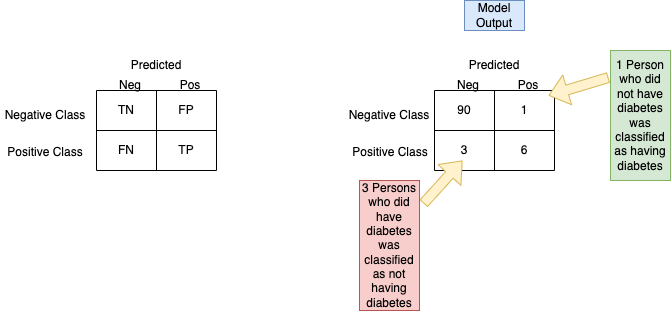

- **Accuracy**: We have over 96% accuracy! This is simply because less than 5% of our data is actually diabetic persons.
- **Precision:** When it predicts yes, how often is it correct? TP/predicted yes = 6/7 = 0.857
- **Recall**: When it's actually yes, how often does it predict yes? TP/actual yes = 6/9 = 0.666
- **F1-Score**: The harmonic mean of precision and recall - 2 * ((precision * recall) / (precision + recall)) = 0.75
- The higher the F1 score the better, with 0 being the worst possible and 1 being the best.
- In this case we might be more concerned with Recall as opposed to Precision.
- We may also want to increase the penalty for FN since they are more detrimental than a FP.
- https://link.springer.com/chapter/10.1007/978-3-030-36178-5_4
- Some material referenced from: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic.

The algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

- https://medium.com/analytics-vidhya/topic-modeling-with-non-negative-matrix-factorization-nmf-3caf3a6bb6da
- https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/
- https://towardsdatascience.com/latent-semantic-analysis-distributional-semantics-in-nlp-ea84bf686b50

In [ ]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [ ]:
documents = list(X)[0:10000]
print(len(documents))

In [ ]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
no_topics = 5

In [ ]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [ ]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

In [ ]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [ ]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

In [ ]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [ ]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)

### WordCloud

In [99]:
# ! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [100]:
def print_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all reviews.".format(len(text)))
    stopwords_set = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    return wordcloud

There are 248540641 words in the combination of all reviews.


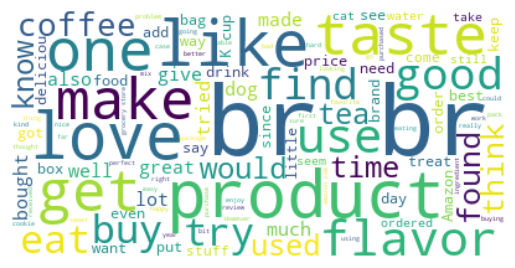

In [101]:
wordcloud = print_cloud(df['Text'])
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)